In [1]:
# Logistical Regression Classification focusing on CMCSA

# data/social_media_sentiment.csv a month of data with a skip and a week

# one example, import social media sentiment of the last one month focused on twitter_score and sum up the hours into a day of twitter_score and if its positive we lable it positive for that day


import finnhub
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import date, datetime, timedelta

# Setup finnhub client - https://finnhub.io/docs/api/
finnhub_client = finnhub.Client(api_key='cd4oqiaad3i98jhu2pggcd4oqiaad3i98jhu2ph0')

today_date = date.today()
from_unix_time = int(time.mktime((today_date - timedelta(weeks = 52)).timetuple()))
to_unix_time = int(time.mktime(today_date.timetuple()))

In [2]:
# Retrieve Stock Candlestick Data
def retrieve_candlestick_data_frame(ticker_symbol):
    candle_response = finnhub_client.stock_candles(symbol=ticker_symbol, resolution='D', _from=from_unix_time, to=to_unix_time)

    candles = pd.json_normalize(candle_response)[['t', 'o', 'c', 'h', 'l', 'v']]

    candles_df = pd.DataFrame(columns=['date','unix_time', 'open', 'close', 'high', 'low', 'volume'])
    candles_df['date'] = pd.to_datetime(candles['t'][0],unit='s').astype(str)
    candles_df['year'] = pd.to_datetime(candles['t'][0],unit='s').year
    candles_df['unix_time'] = candles['t'][0]
    candles_df['open'] = candles['o'][0]
    candles_df['close'] = candles['c'][0]
    candles_df['high'] = candles['h'][0]
    candles_df['low'] = candles['l'][0]
    candles_df['volume'] = candles['v'][0]
    
    return candles_df

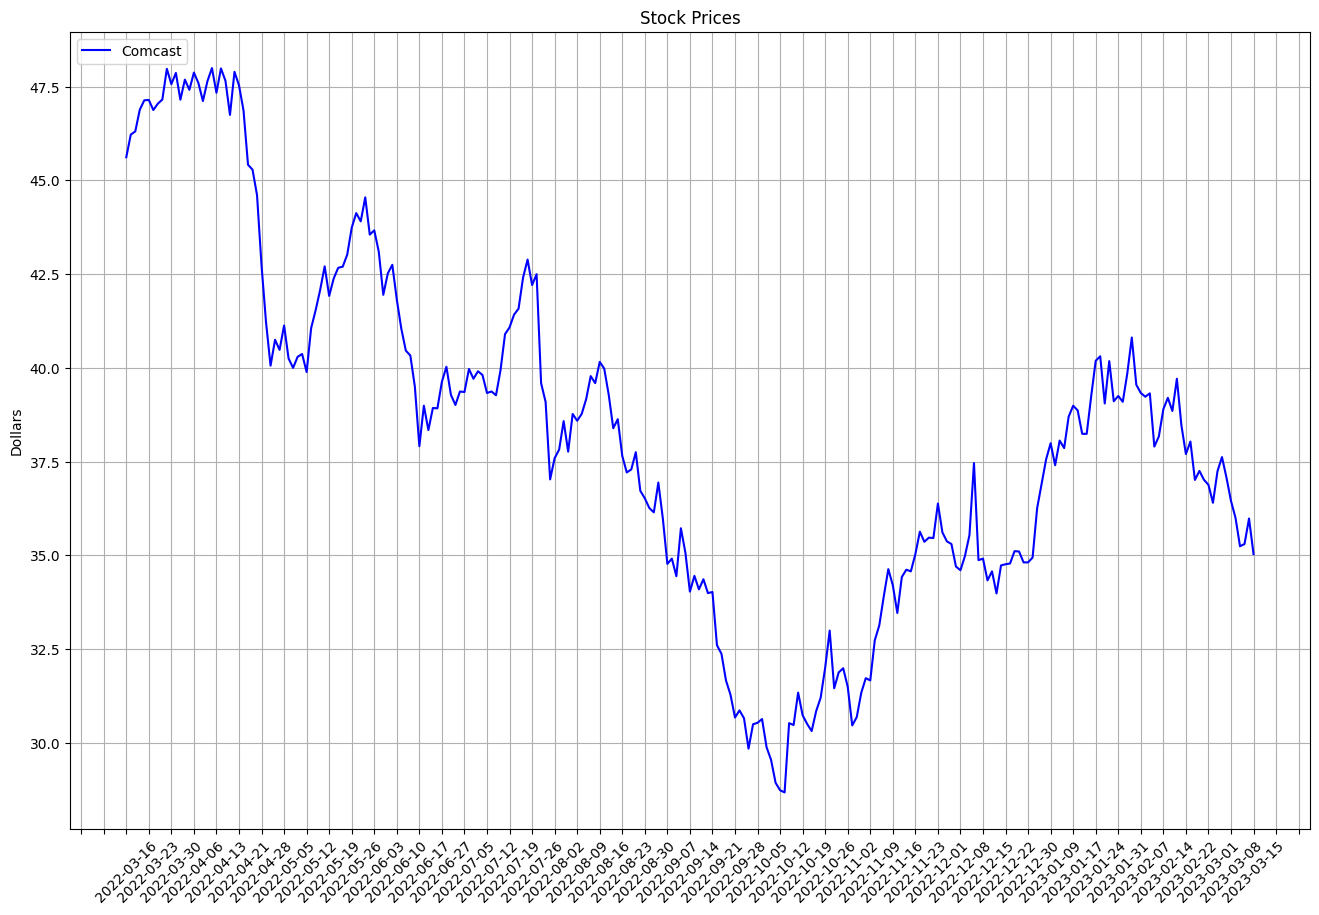

In [3]:
comcast_candles_df = retrieve_candlestick_data_frame('CMCSA')

# set figure and subplot size to 4 x 4, start from 0,0 to row 3
fig = plt.figure(figsize=(16,14),dpi=100)
line_plot = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)

line_plot.plot(comcast_candles_df['date'], comcast_candles_df['open'], label='Comcast', c='b')
line_plot.grid(True)
line_plot.set_title("Stock Prices")
line_plot.set_ylabel("Dollars")
line_plot.xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.legend(loc=2) # set legend to upper left

for tick in line_plot.get_xticklabels():
    tick.set_rotation(45)

In [4]:
import numpy as np

ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
social_Media_csv_file_path = './data/social_media_sentiment.csv'
social_media_df = pd.read_csv(social_Media_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_social_df = social_media_df[social_media_df['symbol'] == 'CMCSA']
#print(comcast_social_df.head())


# sum twitter_score up per day, passing weekend values to Monday (new colum split atTime?)
#comcast_social_df['date'] = 
comcast_social_df['day'] =  pd.to_datetime(comcast_social_df['atTime']).dt.date
#print(comcast_social_df.head())
#print(comcast_social_df.columns)

social_sum = comcast_social_df.groupby('day', as_index=False)[['score_twitter']].sum() # normalize after taking sum for outside of 1, -1 range
#print(social_sum['score_twitter'])

normalized_social_Data = social_sum.copy()
#print(normalized_social_Data.loc[:,'score_twitter'])


normalized_social_Data['normalized'] = normalized_social_Data.loc[:,'score_twitter']/np.linalg.norm(normalized_social_Data.loc[:,'score_twitter'])
  
# normalized data using linalg.norm
print(normalized_social_Data)

#normalizedData = (social_sum.loc[:,'score_twitter']-np.min(social_sum.loc[:,'score_twitter']))/(np.max(social_sum.loc[:,'score_twitter'])-np.min(social_sum.loc[:,'score_twitter']))

#print(normalizedData)


           day  score_twitter  normalized
0   2022-12-02       1.946495    0.060329
1   2022-12-03       8.029816    0.248875
2   2022-12-04      -1.378237   -0.042717
3   2022-12-05      -7.518499   -0.233027
4   2022-12-06      -0.805690   -0.024971
5   2022-12-07      -0.165637   -0.005134
6   2023-02-08       1.477189    0.045784
7   2023-02-09       0.731893    0.022684
8   2023-02-10       3.746666    0.116124
9   2023-02-12      -0.114444   -0.003547
10  2023-02-13      -1.767353   -0.054777
11  2023-02-14      -5.501467   -0.170512
12  2023-02-15      -3.665886   -0.113620
13  2023-02-16      -3.433189   -0.106408
14  2023-02-17      -1.778648   -0.055127
15  2023-02-18      -2.471173   -0.076591
16  2023-02-19      -3.077669   -0.095389
17  2023-02-20      -3.293571   -0.102081
18  2023-02-21       2.254171    0.069866
19  2023-02-22      -1.526552   -0.047314
20  2023-02-23       2.196453    0.068077
21  2023-02-24      -1.426293   -0.044206
22  2023-02-25       2.641107    0

/var/folders/t0/kk3krvdd1_51zhrmf7_cv4580000gp/T/ipykernel_31923/759210127.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast_social_df['day'] =  pd.to_datetime(comcast_social_df['atTime']).dt.date


In [5]:
ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
candle_csv_file_path = './data/candlestick_data.csv'
daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == 'CMCSA']

print(comcast_daily_stock_df.head())
print(comcast_daily_stock_df.tail())
print(len(comcast_daily_stock_df))
print(len(normalized_social_Data))

     symbol        date   unix_time   open  close   high     low    volume
3469  CMCSA  2023-03-15  1678838400  35.03  35.47  35.74  34.630   7552134
3470  CMCSA  2023-03-14  1678752000  35.98  35.28  36.01  34.930  27424270
3471  CMCSA  2023-03-13  1678665600  35.30  35.51  35.95  34.940  22182130
3472  CMCSA  2023-03-10  1678406400  35.24  35.31  35.58  34.990  20414482
3473  CMCSA  2023-03-09  1678320000  36.00  35.47  36.13  35.325  14273827
     symbol        date   unix_time     open  close     high     low    volume
3784  CMCSA  2021-12-10  1639094400  48.2768  48.45  48.5100  47.780  27865400
3785  CMCSA  2021-12-09  1639008000  48.6670  47.81  48.8150  47.590  35048216
3786  CMCSA  2021-12-08  1638921600  49.2700  48.94  49.8401  48.590  36605541
3787  CMCSA  2021-12-07  1638835200  52.3000  49.58  53.1900  48.715  46086870
3788  CMCSA  2021-12-06  1638748800  52.2000  52.35  53.3150  52.060  22334402
320
40


In [6]:
ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
buy_sell_csv_file_path = './data/candlestick_data.csv'
daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == 'CMCSA']

print(comcast_daily_stock_df.head())
print(comcast_daily_stock_df.tail())
print(len(comcast_daily_stock_df))
print(normalized_social_Data)

     symbol        date   unix_time   open  close   high     low    volume
3469  CMCSA  2023-03-15  1678838400  35.03  35.47  35.74  34.630   7552134
3470  CMCSA  2023-03-14  1678752000  35.98  35.28  36.01  34.930  27424270
3471  CMCSA  2023-03-13  1678665600  35.30  35.51  35.95  34.940  22182130
3472  CMCSA  2023-03-10  1678406400  35.24  35.31  35.58  34.990  20414482
3473  CMCSA  2023-03-09  1678320000  36.00  35.47  36.13  35.325  14273827
     symbol        date   unix_time     open  close     high     low    volume
3784  CMCSA  2021-12-10  1639094400  48.2768  48.45  48.5100  47.780  27865400
3785  CMCSA  2021-12-09  1639008000  48.6670  47.81  48.8150  47.590  35048216
3786  CMCSA  2021-12-08  1638921600  49.2700  48.94  49.8401  48.590  36605541
3787  CMCSA  2021-12-07  1638835200  52.3000  49.58  53.1900  48.715  46086870
3788  CMCSA  2021-12-06  1638748800  52.2000  52.35  53.3150  52.060  22334402
320
           day  score_twitter  normalized
0   2022-12-02       1.946495 

In [7]:
## Needs works to exclude/sum up holidys/weekends in social media to match daily stock info 

import pandas as pd



count = 0
for day in normalized_social_Data['day']:
    print('1',day)
    d = pd.Timestamp(day)
    print(d.dayofweek, d.day_name())
    if comcast_daily_stock_df.loc[comcast_daily_stock_df['date'] == day].empty:
    #if day not in comcast_daily_stock_df['date']:
        print('2',d.day_name())
        count += 1
print(len(comcast_daily_stock_df))
print(len(normalized_social_Data))
print(count)  
#d = pd.Timestamp('2022-05-02')
#print(d.dayofweek, d.day_name())

1 2022-12-02
4 Friday
2 Friday
1 2022-12-03
5 Saturday
2 Saturday
1 2022-12-04
6 Sunday
2 Sunday
1 2022-12-05
0 Monday
2 Monday
1 2022-12-06
1 Tuesday
2 Tuesday
1 2022-12-07
2 Wednesday
2 Wednesday
1 2023-02-08
2 Wednesday
2 Wednesday
1 2023-02-09
3 Thursday
2 Thursday
1 2023-02-10
4 Friday
2 Friday
1 2023-02-12
6 Sunday
2 Sunday
1 2023-02-13
0 Monday
2 Monday
1 2023-02-14
1 Tuesday
2 Tuesday
1 2023-02-15
2 Wednesday
2 Wednesday
1 2023-02-16
3 Thursday
2 Thursday
1 2023-02-17
4 Friday
2 Friday
1 2023-02-18
5 Saturday
2 Saturday
1 2023-02-19
6 Sunday
2 Sunday
1 2023-02-20
0 Monday
2 Monday
1 2023-02-21
1 Tuesday
2 Tuesday
1 2023-02-22
2 Wednesday
2 Wednesday
1 2023-02-23
3 Thursday
2 Thursday
1 2023-02-24
4 Friday
2 Friday
1 2023-02-25
5 Saturday
2 Saturday
1 2023-02-26
6 Sunday
2 Sunday
1 2023-02-27
0 Monday
2 Monday
1 2023-02-28
1 Tuesday
2 Tuesday
1 2023-03-01
2 Wednesday
2 Wednesday
1 2023-03-02
3 Thursday
2 Thursday
1 2023-03-03
4 Friday
2 Friday
1 2023-03-04
5 Saturday
2 Saturday


In [8]:
comcast_daily_stock_df['date'] = pd.to_datetime(comcast_daily_stock_df['date'])
normalized_social_Data['day'] = pd.to_datetime(normalized_social_Data['day'])
start_date = normalized_social_Data['day'].min()
end_date = normalized_social_Data['day'].max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
missing_dates = set(all_dates) - set(comcast_daily_stock_df['date'])
print(missing_dates)

{Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-02-19 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-03-05 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2022-12-11 00:00:00', freq='D'), Timestamp('2022-12-26 00:00:00', freq='D'), Timestamp('2022-12-24 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-02-04 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-02-18 00:00:00', freq='D'), Timestamp('2022-12-10 00:00:00', freq='D'), Timestamp('2022-12-17 00:00:00', freq='D'), Timestamp('2022-12-25 00:00:00', freq='D'), Timestamp('2022-12-04 00:00:00', freq='D'), Timestamp('2023-02-25 00:00:00', freq='D'), Timestamp('2023-03-12 00:00:00', freq='D'), Timestamp('2022-12-03 00:00:00', freq='D'), Timestamp('2023-02-05 00:00:00'

/var/folders/t0/kk3krvdd1_51zhrmf7_cv4580000gp/T/ipykernel_31923/774708663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast_daily_stock_df['date'] = pd.to_datetime(comcast_daily_stock_df['date'])


In [9]:

comcast_daily_stock_df.index = comcast_daily_stock_df['date']
new_df = pd.DataFrame(comcast_daily_stock_df.iloc[:,-5:])
#new_df.reindex(index=new_df.index[::-1])
new_df = new_df.sort_values(by='date')
print(new_df)
normalized_daily_stock_price = new_df.copy()
#normalized_daily_stock_price['label'] = np.where(normalized_daily_stock_price['close'].shift(-1) > normalized_daily_stock_price['close'], 1, 0)


               open  close     high     low    volume
date                                                 
2021-12-06  52.2000  52.35  53.3150  52.060  22334402
2021-12-07  52.3000  49.58  53.1900  48.715  46086870
2021-12-08  49.2700  48.94  49.8401  48.590  36605541
2021-12-09  48.6670  47.81  48.8150  47.590  35048216
2021-12-10  48.2768  48.45  48.5100  47.780  27865400
...             ...    ...      ...     ...       ...
2023-03-09  36.0000  35.47  36.1300  35.325  14273827
2023-03-10  35.2400  35.31  35.5800  34.990  20414482
2023-03-13  35.3000  35.51  35.9500  34.940  22182130
2023-03-14  35.9800  35.28  36.0100  34.930  27424270
2023-03-15  35.0300  35.47  35.7400  34.630   7552134

[320 rows x 5 columns]


In [10]:
predict_days = 20

In [11]:
new_df['prediction'] = new_df['close'].shift(-predict_days)
#new_df['prediction'] = new_df['close']
print(new_df.tail(62))

             open  close    high      low    volume  prediction
date                                                           
2022-12-14  34.87  35.35  36.210  34.7300  33913385       38.93
2022-12-15  34.91  34.61  35.175  34.4501  27713382       38.94
2022-12-16  34.33  34.49  34.765  34.0550  68862194       38.28
2022-12-19  34.57  33.98  34.740  33.9300  23725032       38.14
2022-12-20  33.98  34.41  34.555  33.7800  31933111       39.37
...           ...    ...     ...      ...       ...         ...
2023-03-09  36.00  35.47  36.130  35.3250  14273827         NaN
2023-03-10  35.24  35.31  35.580  34.9900  20414482         NaN
2023-03-13  35.30  35.51  35.950  34.9400  22182130         NaN
2023-03-14  35.98  35.28  36.010  34.9300  27424270         NaN
2023-03-15  35.03  35.47  35.740  34.6300   7552134         NaN

[62 rows x 6 columns]


In [12]:
X = np.array(new_df.drop(['prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days

In [13]:
y = np.array(new_df['prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(300,)


In [14]:
from sklearn.model_selection import train_test_split
#update TDM and labels

X_train, X_test, y_train_labels, y_test_labels = train_test_split(X,  y, train_size=0.75, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train_labels.shape)
print(X_test.shape)
print(y_test_labels.shape)

(225, 5)
(225,)
(75, 5)
(75,)


In [15]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance, accuracy_score


In [16]:




linear_model = RandomForestRegressor()
linear_model.fit(X_train, y_train_labels)
#predictions = linear_model.predict(X_test)
#print(predictions)


RandomForestRegressor()

In [17]:
linear_model_score = linear_model.score(X_test, y_test_labels)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.8083071532103169


In [18]:
X_predict = np.array(new_df.drop(['prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(new_df.drop(['prediction'], 1)))

/var/folders/t0/kk3krvdd1_51zhrmf7_cv4580000gp/T/ipykernel_31923/1230743224.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_predict = np.array(new_df.drop(['prediction'], 1))[-predict_days:]
/var/folders/t0/kk3krvdd1_51zhrmf7_cv4580000gp/T/ipykernel_31923/1230743224.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  linear_model_real_prediction = linear_model.predict(np.array(new_df.drop(['prediction'], 1)))


In [19]:
from datetime import datetime

predicted_dates = []
recent_date = new_df.index.max()
#datetime_object = datetime.strptime(recent_date, '%Y-%m-%d')
display_at = recent_date
alpha = 0.5

for i in range(predict_days):   
 #   datetime_object = datetime.strptime(recent_date, '%Y-%m-%d')
 #   recent_date = str((datetime_object.date() + timedelta(days=1)))
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

date
2021-12-06    52.35
2021-12-07    49.58
2021-12-08    48.94
2021-12-09    47.81
2021-12-10    48.45
              ...  
2023-03-09    35.47
2023-03-10    35.31
2023-03-13    35.51
2023-03-14    35.28
2023-03-15    35.47
Name: close, Length: 320, dtype: float64
[Timestamp('2023-03-16 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-03-20 00:00:00'), Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-22 00:00:00'), Timestamp('2023-03-23 00:00:00'), Timestamp('2023-03-24 00:00:00'), Timestamp('2023-03-25 00:00:00'), Timestamp('2023-03-26 00:00:00'), Timestamp('2023-03-27 00:00:00'), Timestamp('2023-03-28 00:00:00'), Timestamp('2023-03-29 00:00:00'), Timestamp('2023-03-30 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-04-02 00:00:00'), Timestamp('2023-04-03 00:00:00'), Timestamp('2023-04-04 00:00:00')]


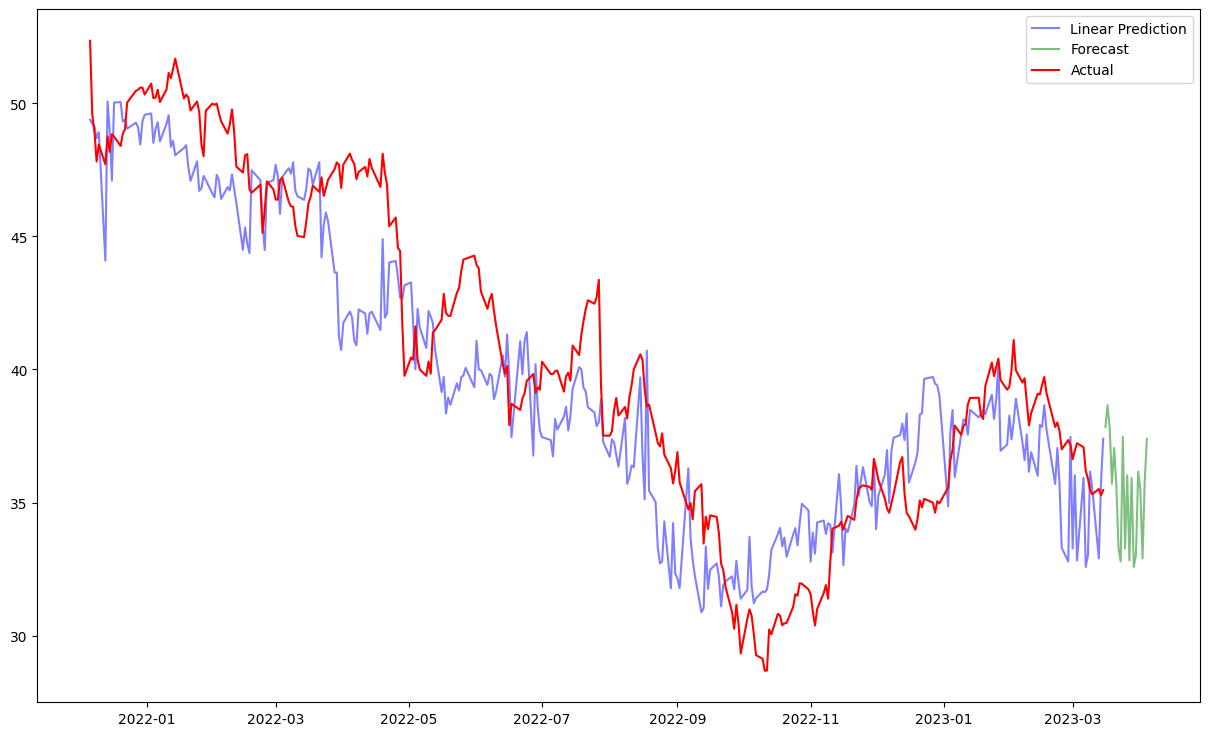

In [20]:
print(new_df['close'])
print(predicted_dates)
plt.figure(figsize=(15, 9))
plt.plot(new_df.index[0:], linear_model_real_prediction[0:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(new_df.index[0:], new_df['close'][0:], label='Actual', color='red')
plt.legend()

In [21]:
normalized_stock_data = comcast_daily_stock_df.copy()
#print(normalized_social_Data.loc[:,'score_twitter'])


normalized_stock_data['normalized'] = normalized_stock_data.loc[:,'close']/np.linalg.norm(normalized_stock_data.loc[:,'close'])
  
# normalized data using linalg.norm
print(normalized_stock_data["close"].iloc[39:])
print(len(normalized_stock_data["close"].iloc[-39:]))
print(normalized_stock_data["close"].iloc[-39:].shape)

normalized_stock_data_np = np.array(normalized_stock_data["normalized"].iloc[-39:])
print(normalized_stock_data_np.shape)
normalized_stock_data_np.reshape(1, -1)
print(normalized_stock_data_np.shape)

#print(normalized_stock_data.iloc[4[30:]])

date
2023-01-18    38.28
2023-01-17    38.94
2023-01-13    38.93
2023-01-12    38.69
2023-01-11    37.95
              ...  
2021-12-10    48.45
2021-12-09    47.81
2021-12-08    48.94
2021-12-07    49.58
2021-12-06    52.35
Name: close, Length: 281, dtype: float64
39
(39,)
(39,)
(39,)


In [22]:
social_labels = []

for score in normalized_social_Data['normalized']:
    if score >= 0:
        social_labels.append(1)
    else:
        social_labels.append(0)
        
print(social_labels)
print(len(social_labels))

 
# converting list to array
social_labels_np = np.array(social_labels)
social_labels_np.reshape(1, -1)

print(social_labels_np.shape)
print(social_labels_np)

print(len(normalized_stock_data[-39:]))


[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40
(40,)
[1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
39


In [23]:
from sklearn.model_selection import train_test_split
#update TDM and labels

train, test, train_labels, test_labels = train_test_split(normalized_stock_data_np,  social_labels_np, train_size=0.75, test_size=0.25, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [39, 40]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

logistic_social_media_sentiment = LogisticRegression(solver='lbfgs', max_iter=1000)
print(train.reshape(-1, 1), train_labels)
print(train.shape, train_labels.shape)
logistic_social_media_sentiment.fit(train.reshape(-1, 1), train_labels)
predictions = logistic_social_media_sentiment.predict(test.reshape(-1, 1))
score = accuracy_score(predictions, test_labels)
print(f"Accuracy score: {score}")
print(f"Precision: {precision_score(predictions, test_labels)}")
print(f"Recall: {recall_score(predictions, test_labels)}")
print(f"F1: {f1_score(predictions, test_labels)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logistic_social_media_sentiment = LogisticRegression(solver='lbfgs', max_iter=1000)

print(train, train_labels)

#logistic_social_media_sentiment.fit(train, train_labels)

#predictions = logistic_social_media_sentiment.predict(test)

#score = accuracy_score(predictions, test_labels)

#print(f"Accuracy score: {score}")

In [24]:
def predict(classifier_model, train_x, train_y, test_x):
    trained_classifier = classifier_model.fit(train_x, train_y)
    prediction = trained_classifier.predict(test_x)
    return prediction

def visualization(stock_df, x_test, y_test, y_prediction, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)

    ax.plot(stock_df['unix_time'], stock_df['close'], label='actual', c='b')
    ax.plot(x_test['unix_time'], y_test, label='test', c='r')
    ax.plot(x_test['unix_time'], y_prediction, label='prediction', c='g')

    plt.tight_layout()
    plt.legend()
    plt.show()


def metrics(y_true, y_pred, model_name):
    metric_list = [explained_variance_score, max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance]
    metric_names = ['explained_variance_score', 'max_error', 'mean_squared_error', 'median_absolute_error', 'mean_absolute_percentage_error', 'mean_poisson_deviance']

    print(f"Model: {model_name}")
    
    for idx, metric in enumerate(metric_list):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]}: {metric_result}")

    print("------------\n\n")

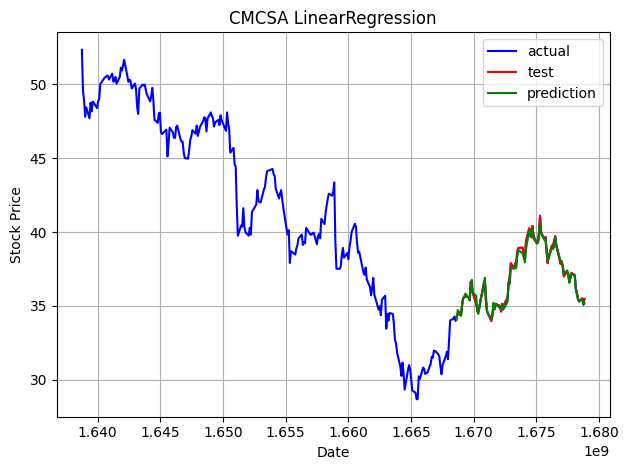

Model: CMCSA LinearRegression
explained_variance_score: 0.9877340647273996
max_error: 0.5316842926867551
mean_squared_error: 0.050111443566009314
median_absolute_error: 0.13922081234833072
mean_absolute_percentage_error: 0.0046503727247113
mean_poisson_deviance: 0.001342102915333676
------------




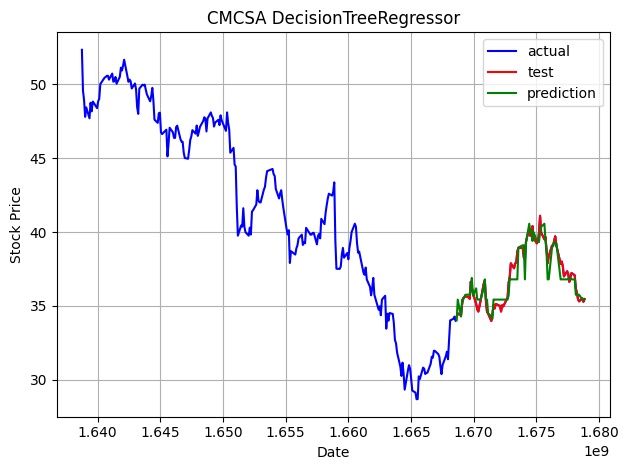

Model: CMCSA DecisionTreeRegressor
explained_variance_score: 0.8963292173050008
max_error: 1.8900000000000006
mean_squared_error: 0.389053750000001
median_absolute_error: 0.33000000000000185
mean_absolute_percentage_error: 0.012667956206362435
mean_poisson_deviance: 0.010465275479582915
------------




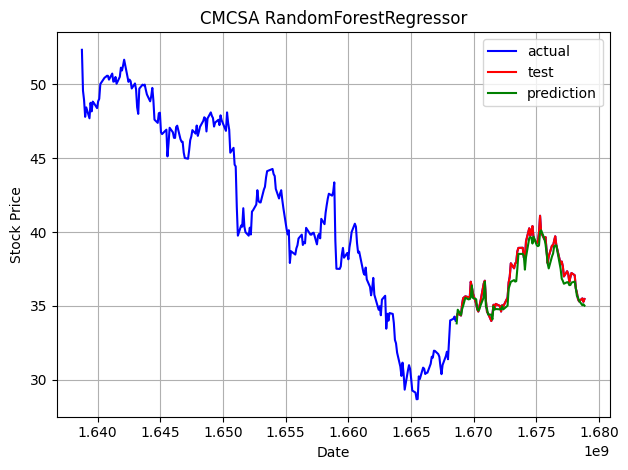

Model: CMCSA RandomForestRegressor
explained_variance_score: 0.9538761117882502
max_error: 1.2725999999999758
mean_squared_error: 0.3085768751249887
median_absolute_error: 0.3451999999999984
mean_absolute_percentage_error: 0.011362611766911881
mean_poisson_deviance: 0.008241374679601954
------------




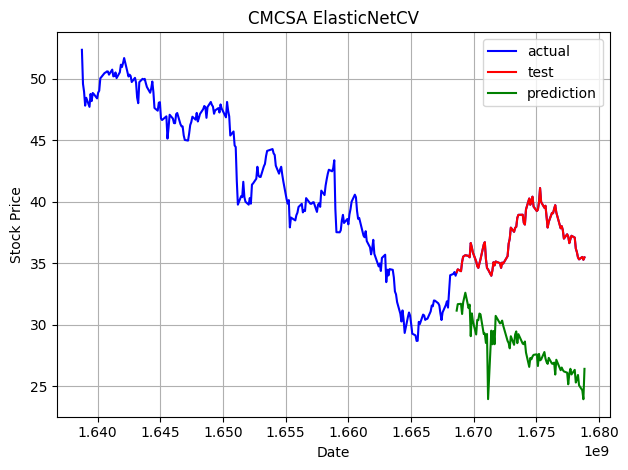

Model: CMCSA ElasticNetCV
explained_variance_score: -1.9471434949001583
max_error: 14.008891539799478
mean_squared_error: 88.62447363038983
median_absolute_error: 9.782355053846327
mean_absolute_percentage_error: 0.23520108574128762
mean_poisson_deviance: 2.9025320217081148
------------




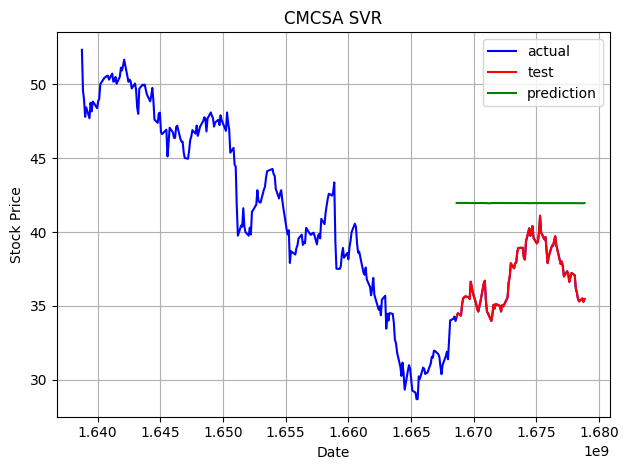

Model: CMCSA SVR
explained_variance_score: -0.00161986315641105
max_error: 7.990059263091105
mean_squared_error: 28.35235366835069
median_absolute_error: 5.136914765174716
mean_absolute_percentage_error: 0.13726638082048476
mean_poisson_deviance: 0.7116223710597284
------------




In [25]:
ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'
daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == ticker_symbol]

daily_stock_df = daily_stock_df.drop('date',axis=1).drop('symbol',axis = 1)

data_x = daily_stock_df.loc[:,daily_stock_df.columns != 'close' ]
data_y = daily_stock_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, shuffle=False, random_state=1)

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), ElasticNetCV(), SVR()]
predictions = []
results = {}

for model in models:
    predictions.append([predict(model, x_train, y_train, x_test), ticker_symbol + " " + str(model)[:-2]])

for prediction in predictions:
    visualization(daily_stock_df, x_test, y_test, prediction[0], prediction[1])
    metrics(y_test, prediction[0], prediction[1])
